In [19]:
%load_ext autoreload
%autoreload 2

codebase = '/home/studio-lab-user/701-simplicity-bias'
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(codebase)
from synthetic_data.linear_slabs import LinearSlabDataset
from pathlib import Path


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_config = dict(
    num_samples=20000,
    num_dim=50,
    margins=0.1,
    width=1.0,
    random_orthonormal_transform=True
)

lms_7_noisy_data_config = {**data_config, **{'slabs': np.array([2] + [7] * 49),
                                         'noise_proportions': np.array([0.1] + [0] * 49),
                                         'slab_probabilities': [[1.0, 1.0]] +
                                                               [[1/16.0, 0.25, 7 / 16.0, 0.5, 7 / 16.0, 0.25, 1 / 16.0]] * 49}}

lms_5_noisy_data_config = {**data_config, **{'slabs': np.array([2] + [5] * 49),
                                         'noise_proportions': np.array([0.1] + [0] * 49),
                                         'slab_probabilities': [[1.0, 1.0]] +  [[0.125, 0.5, 0.75, 0.5, 0.125]] * 49}}

ms_57_noisy_data_config = {**data_config, **{'slabs': np.array([5] + [7] * 49), 
                                        'noise_proportions': np.array([0.1] + [0] * 49),
                                       'slab_probabilities': [[0.125, 0.5, 0.75, 0.5, 0.125]] +
                                                         [[1/16.0, 0.25, 7 / 16.0, 0.5, 7 / 16.0, 0.25, 1 / 16.0]] * 49}}

In [3]:
lms7 = LinearSlabDataset.generate(**lms_7_noisy_data_config)
lms5 = LinearSlabDataset.generate(**lms_5_noisy_data_config)
ms57 = LinearSlabDataset.generate(**ms_57_noisy_data_config)

In [4]:
print(lms7)

<LinearSlabDataset with 20000 samples and 50 feature dimensions>


In [43]:
def visualize_lms_array_plot(x, y, w, save=None, xlabel='Linear', ylabel='5-slab'):
    cmap = 'coolwarm'
    font = Path(os.path.join(codebase, 'notebooks', 'Times New Roman.ttf'))

    fig = plt.figure(figsize=(3.7, 3), dpi=500)
    x = x@(w.T)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, s=4, alpha=0.8)
    plt.xlabel('Linear', fontsize=15, font=font)
    plt.ylabel('5-slab', fontsize=15, font=font)
    
    ax = plt.gca()
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_font(font) for label in labels]
    [label.set_fontsize(13) for label in labels]

    fig.tight_layout()
    
    if save:
        plt.savefig(save, bbox_inches='tight', pad_inches=0, dpi=1200)
    plt.show()

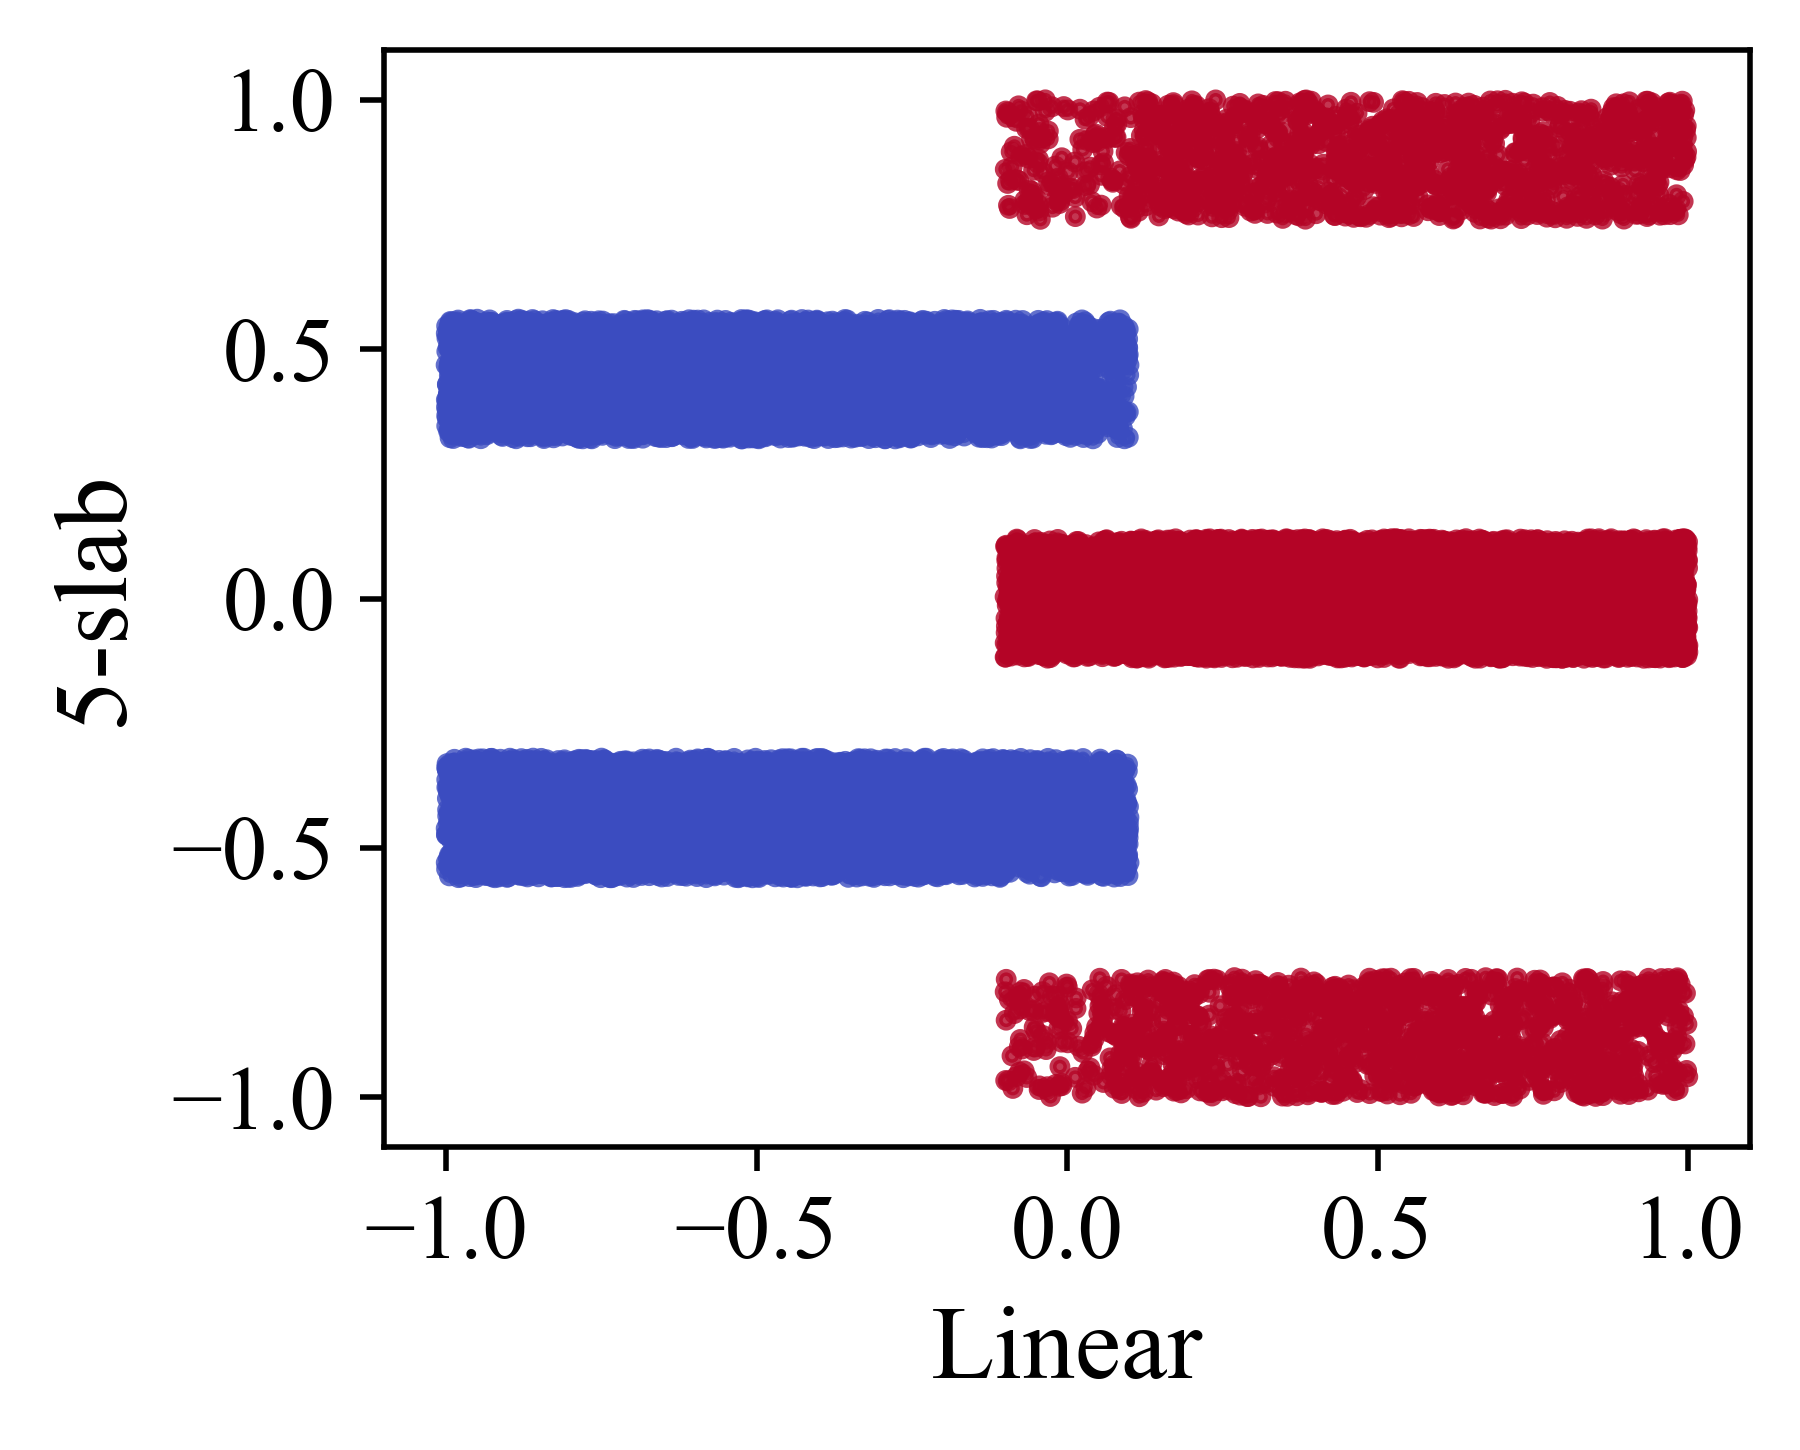

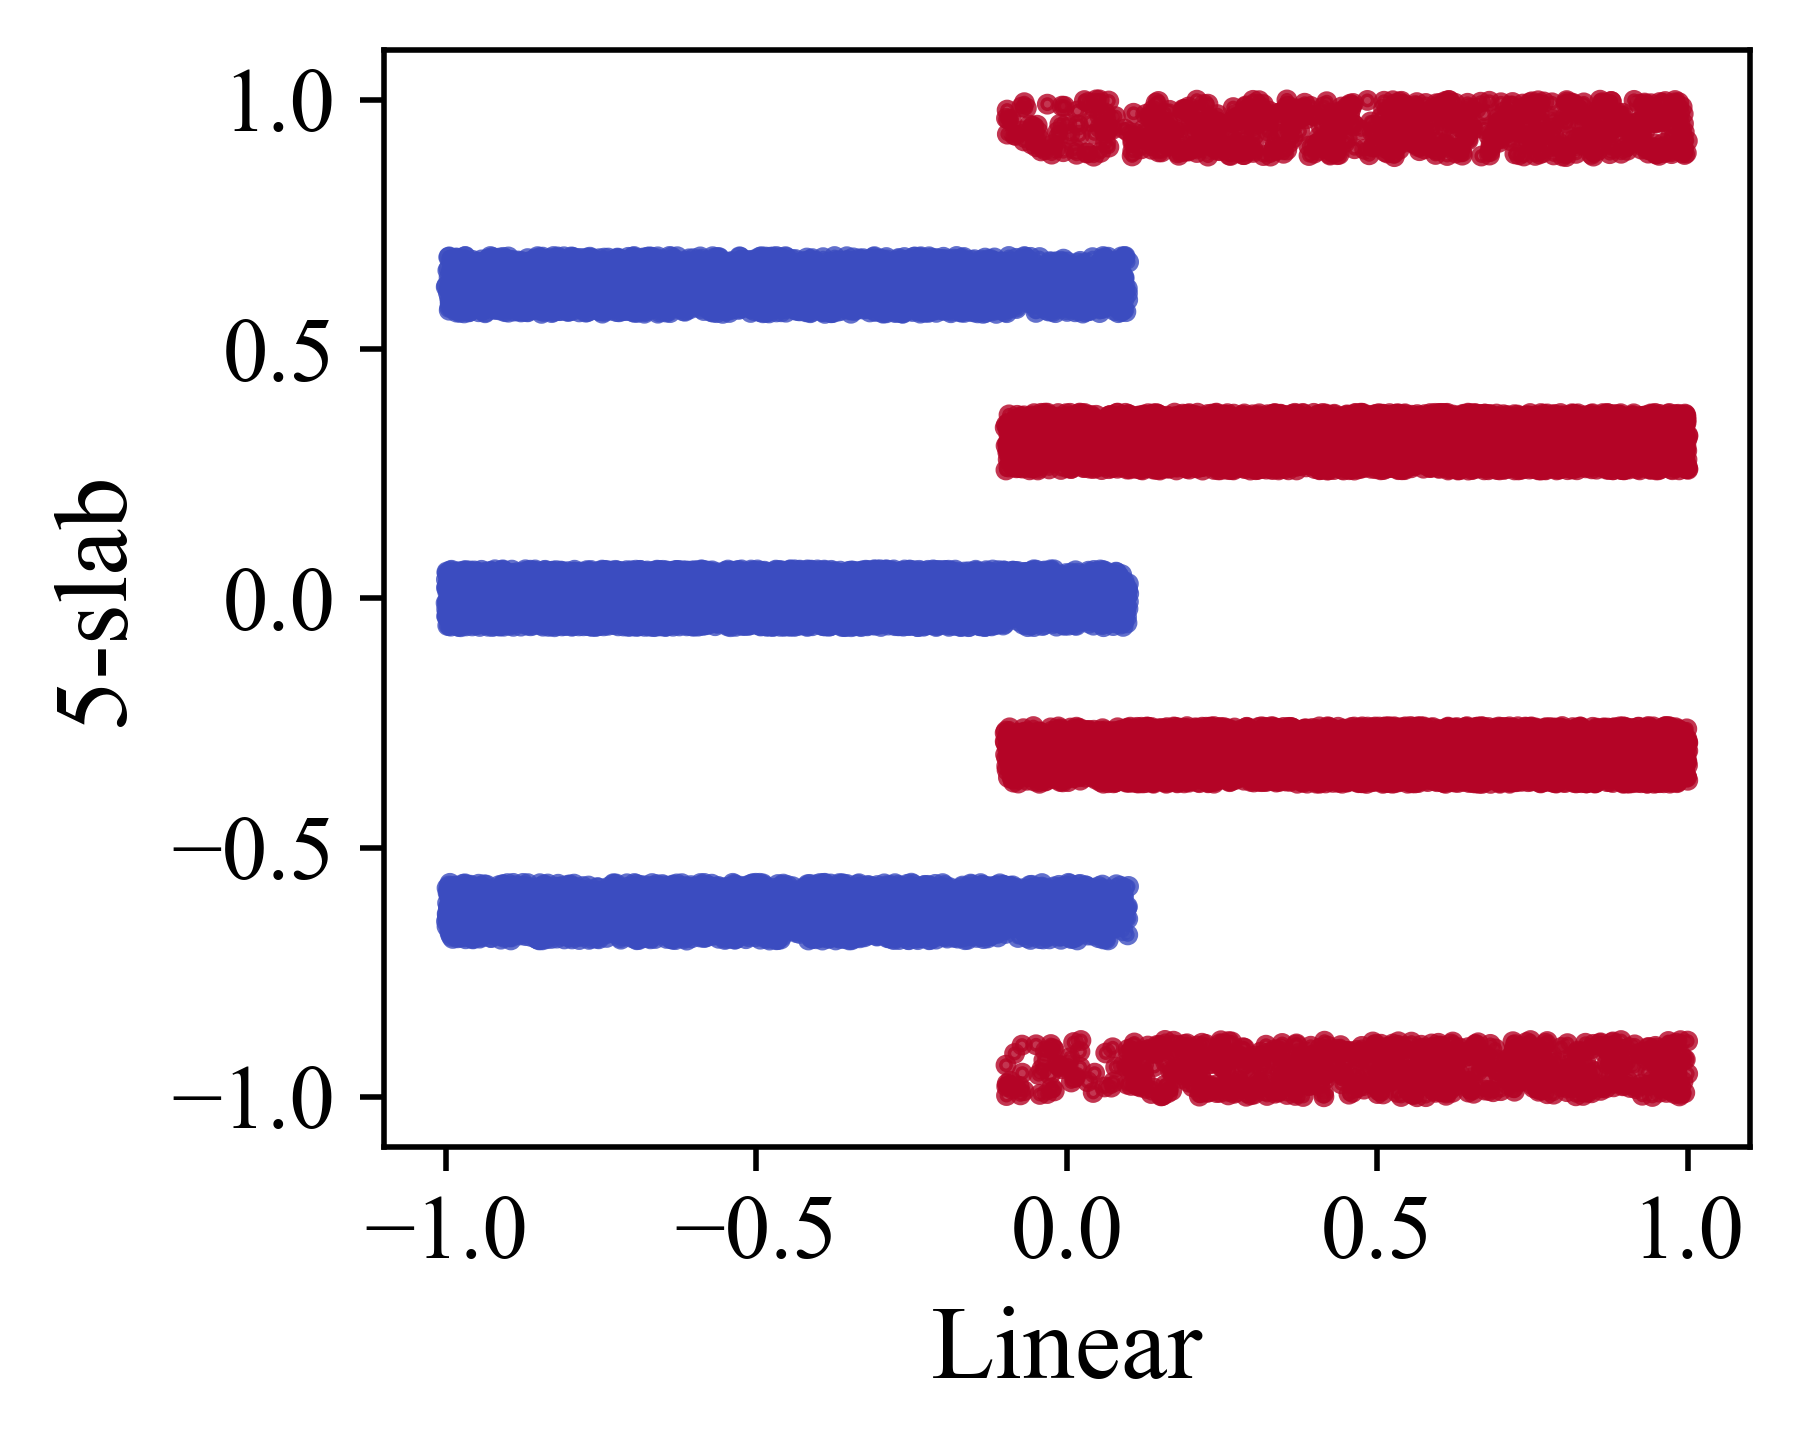

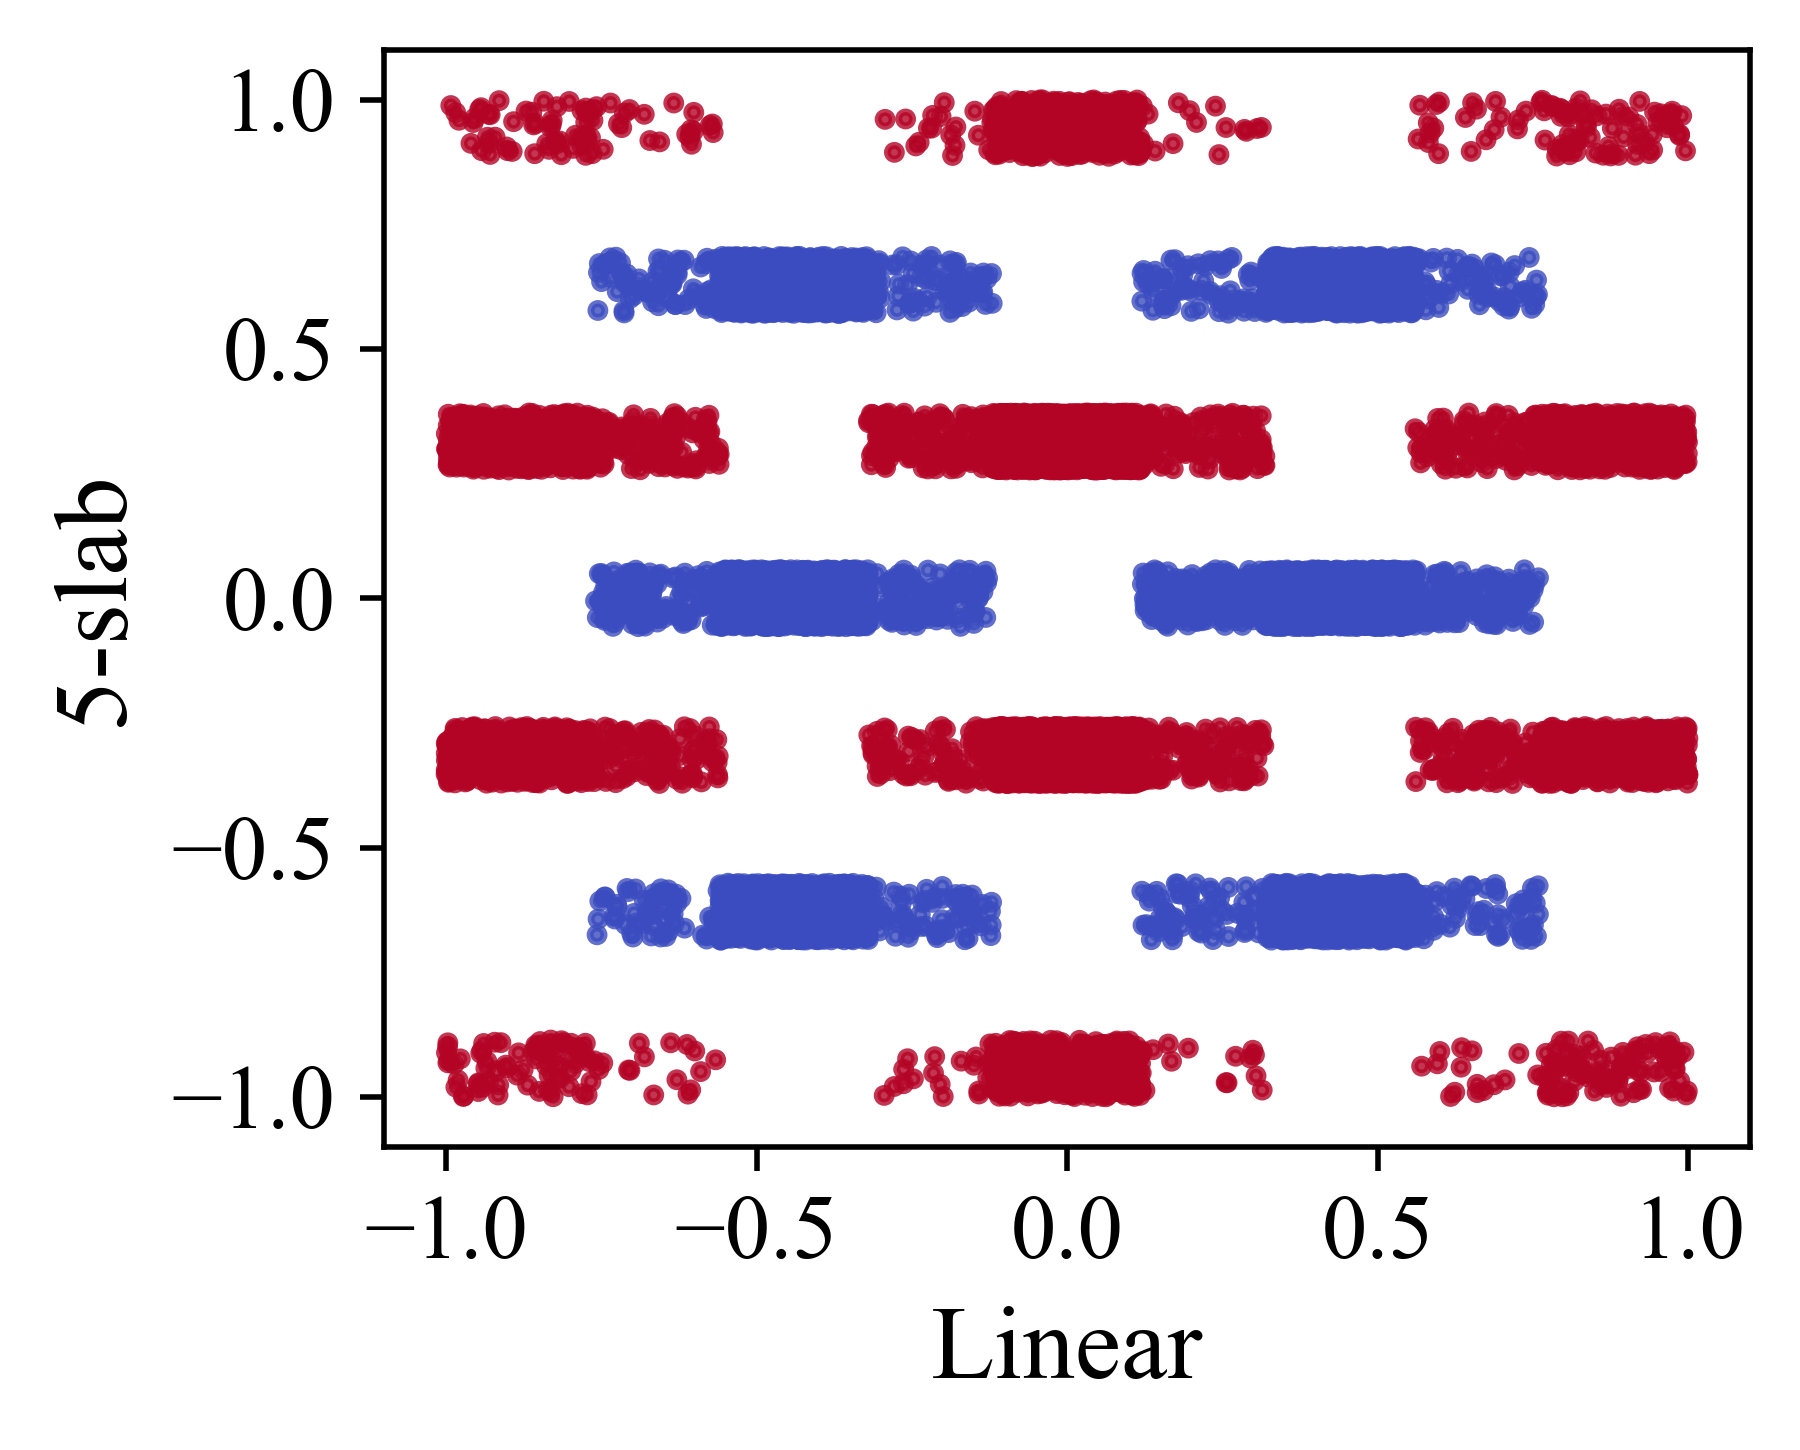

In [44]:
# We may wish to save as png here as the rendering of a scatter plot with 20000 points in the PDF can be very slow
visualize_lms_array_plot(lms5.tensors[0].numpy(), lms5.tensors[1].numpy(), lms5.w, save='data_lms5.png', xlabel='Linear', ylabel='5-slab')
visualize_lms_array_plot(lms7.tensors[0].numpy(), lms7.tensors[1].numpy(), lms7.w, save='data_lms7.png', xlabel='Linear', ylabel='7-slab')
visualize_lms_array_plot(ms57.tensors[0].numpy(), ms57.tensors[1].numpy(), ms57.w, save='data_ms57.png', xlabel='5-slab', ylabel='7-slab')